In [2]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #avoid warning flash
warnings.filterwarnings('ignore')
from sklearn.preprocessing import QuantileTransformer

In [3]:
dataframe = pd.read_excel("Book1.xlsx")
dataframe.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,116,74,0,0,25.6,0.201,30,0
1,78,50,32,88,31.0,0.248,26,1
2,115,0,0,0,35.3,0.134,29,0
3,197,70,45,543,30.5,0.158,53,1
4,99,84,0,0,35.4,0.388,50,0


In [4]:
print('Shape of Diabetes dataset is :',dataframe.shape)
print('Size of Diabetes dataset is  :',dataframe.size)

Shape of Diabetes dataset is : (100, 8)
Size of Diabetes dataset is  : 800


In [5]:
dataframe.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# Drop if there are duplicates rows.
dataframe = dataframe.drop_duplicates()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   100 non-null    int64  
 1   BloodPressure             100 non-null    int64  
 2   SkinThickness             100 non-null    int64  
 3   Insulin                   100 non-null    int64  
 4   BMI                       100 non-null    float64
 5   DiabetesPedigreeFunction  100 non-null    float64
 6   Age                       100 non-null    int64  
 7   Outcome                   100 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 7.0 KB


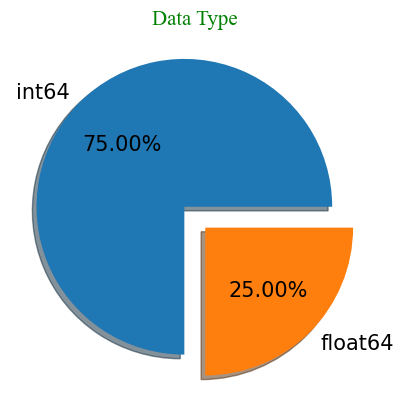

In [7]:
plt.rcParams.update({'font.size': 15})

dataframe.dtypes.value_counts().plot.pie(explode=[0.1, 0.1],
                                       autopct='%1.2f%%',
                                       shadow=True)
plt.title('Data Type',
          color='Green',
          loc='center',
          font='Times New Roman');

In [8]:
dataframe.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,119.710000,67.660000,21.780000,84.180000,31.843000,0.479850,32.120000,0.370000
std,31.343743,23.101104,15.959279,111.750659,7.966321,0.342377,9.909979,0.485237
min,71.000000,0.000000,0.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,96.000000,60.000000,0.000000,0.000000,26.800000,0.251250,24.000000,0.000000
50%,112.500000,70.000000,25.000000,54.000000,31.800000,0.371500,29.000000,0.000000
75%,137.750000,82.000000,33.000000,140.000000,36.650000,0.605500,38.000000,1.000000
max,197.000000,122.000000,54.000000,545.000000,49.700000,2.137000,62.000000,1.000000


In [9]:
# show how many columns has 0 values and sum it

featureList = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
print(dataframe[featureList].isin({0}).sum())

Glucose           0
BloodPressure     7
SkinThickness    26
Insulin          41
BMI               1
dtype: int64


In [10]:
# Replacing 0 values with mean or median of that column
dataframe['Glucose']=dataframe['Glucose'].replace(0,dataframe['Glucose'].mean())#normal distribution
dataframe['BloodPressure']=dataframe['BloodPressure'].replace(0,dataframe['BloodPressure'].mean())#normal distribution
dataframe['SkinThickness']=dataframe['SkinThickness'].replace(0,dataframe['SkinThickness'].median())#skewed distribution
dataframe['Insulin']=dataframe['Insulin'].replace(0,dataframe['Insulin'].median())#skewed distribution
dataframe['BMI']=dataframe['BMI'].replace(0,dataframe['BMI'].median())#skewed distribution

In [11]:
# Now verify whether there are any 0 values
featureList = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
print(dataframe[featureList].isin({0}).sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


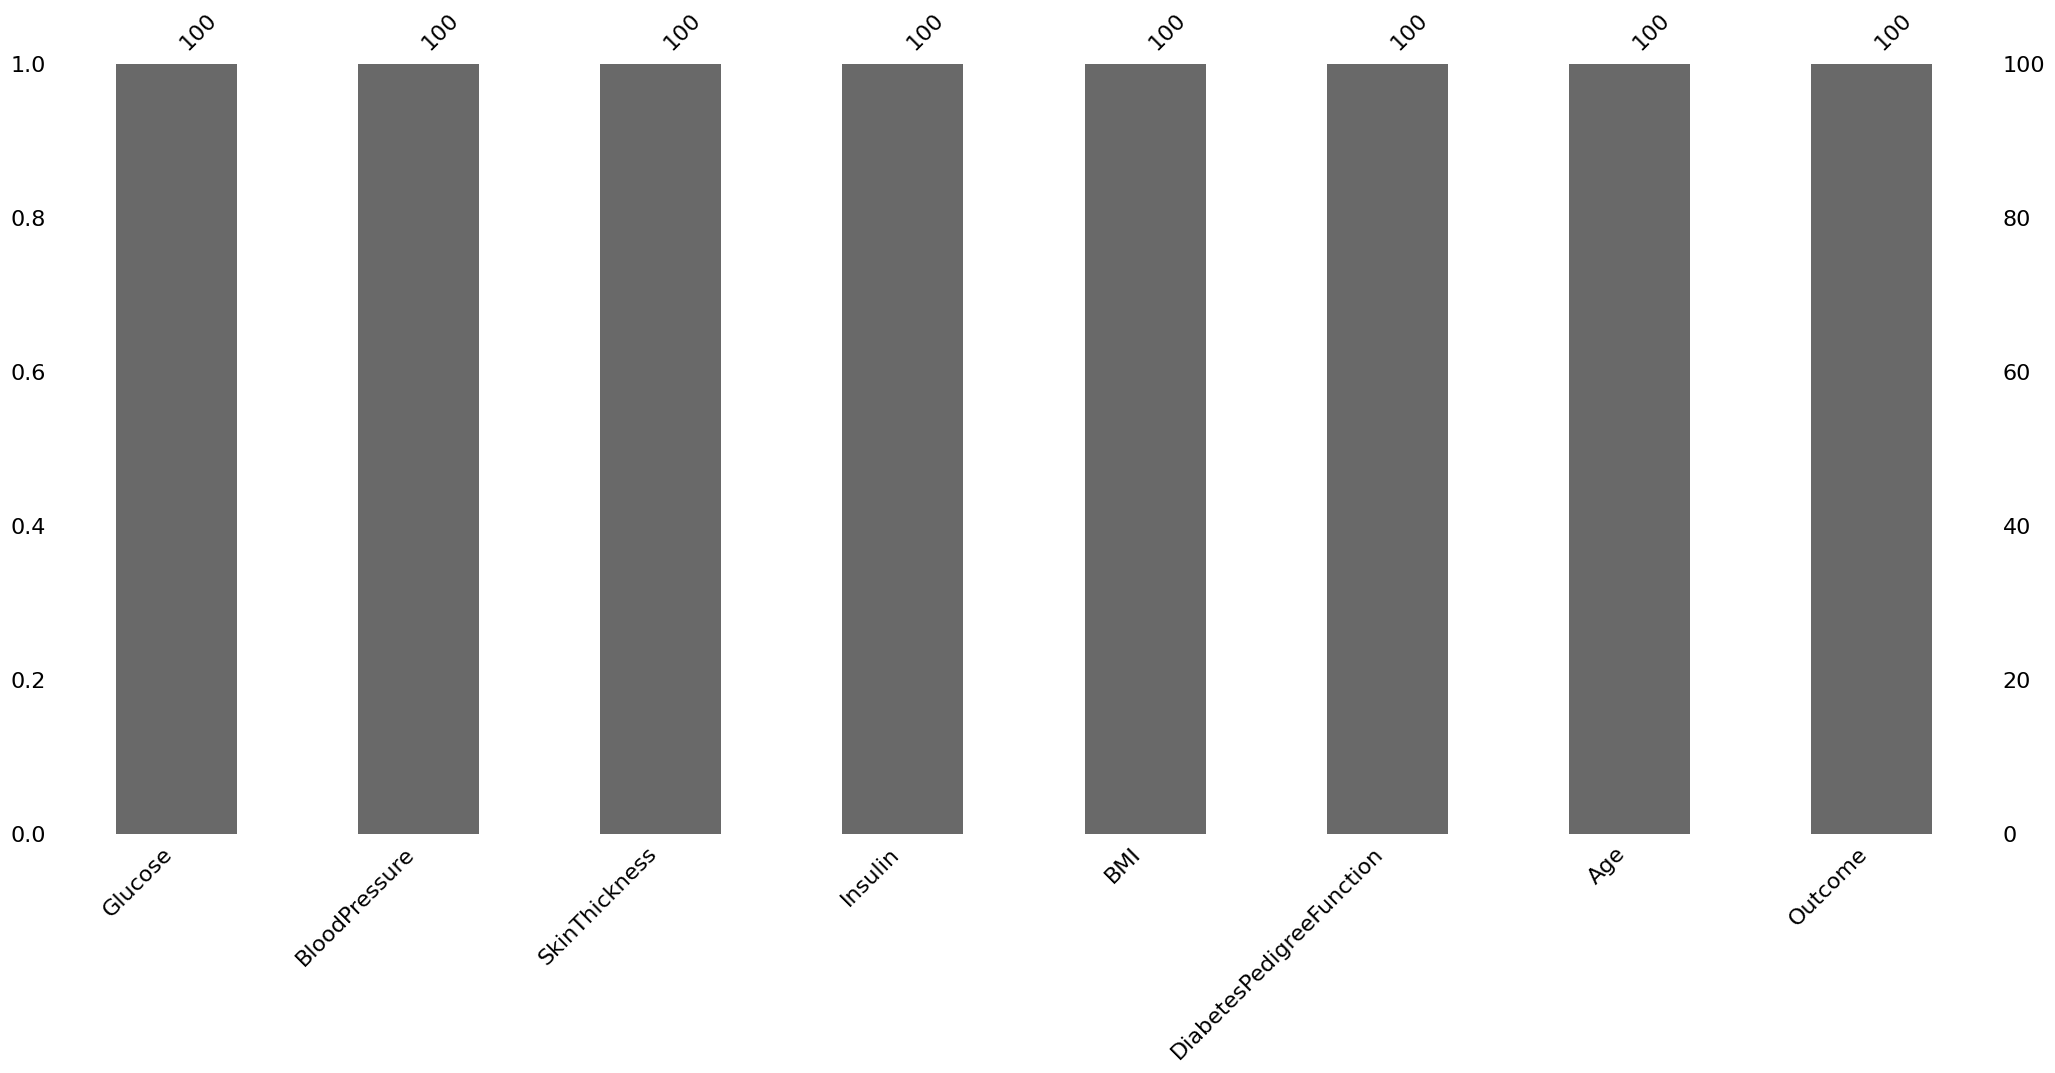

In [12]:
# check for Null values 
import missingno as msno
msno.bar(dataframe)
plt.show()

In [13]:
# replacing the value 0 and 1 in column name Outcome for readability
dataframe["Outcome"].replace(0,"Non-Diabetic",inplace=True) 
dataframe["Outcome"].replace(1,"Diabetic",inplace=True)
dataframe["Outcome"]

0     Non-Diabetic
1         Diabetic
2     Non-Diabetic
3         Diabetic
4     Non-Diabetic
          ...     
95        Diabetic
96    Non-Diabetic
97        Diabetic
98    Non-Diabetic
99    Non-Diabetic
Name: Outcome, Length: 100, dtype: object

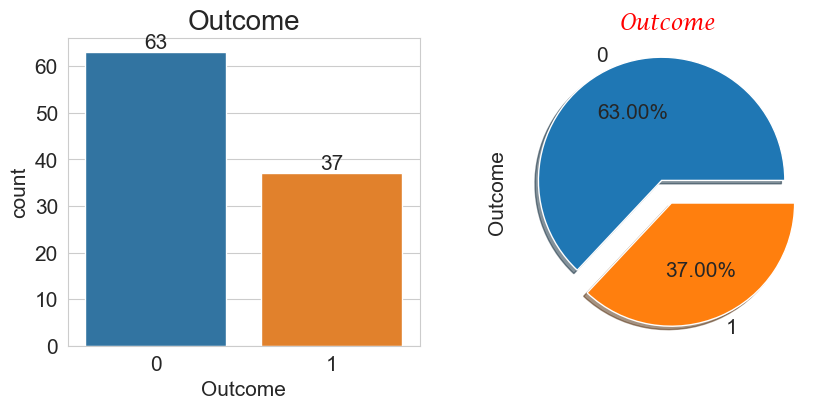

In [36]:
# plot the no of patients 
plt.figure(figsize=(10,4))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Outcome', data=dataframe)
ax.bar_label(ax.containers[0])
plt.title("Outcome", fontsize=20)

ax =plt.subplot(1,2,2)
ax=dataframe['Outcome'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Outcome", fontsize = 20,color='Red',font='Lucida Calligraphy');

In [15]:
# for my analysis purpose i am saving the diabetic and non-diabetic data in different variables.
Diabetic = dataframe[dataframe["Outcome"]=="Diabetic"]
Non_diabetic = dataframe[dataframe["Outcome"]=="Non-Diabetic"]
Diabetic.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,78,50.0,32,88,31.0,0.248,26,Diabetic
3,197,70.0,45,543,30.5,0.158,53,Diabetic
5,196,90.0,25,54,39.8,0.451,41,Diabetic
6,119,80.0,35,54,29.0,0.263,29,Diabetic
7,143,94.0,33,146,36.6,0.254,51,Diabetic


In [16]:
Diabetic.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,141.270270,75.918378,30.621622,132.810811,35.032432,0.537405,37.567568
std,31.596104,13.235496,7.436215,107.069769,5.968578,0.436407,10.070696
min,78.000000,50.000000,14.000000,36.000000,25.100000,0.153000,24.000000
25%,120.000000,67.660000,25.000000,54.000000,31.000000,0.234000,29.000000
50%,136.000000,72.000000,29.000000,115.000000,34.100000,0.356000,38.000000
75%,170.000000,85.000000,33.000000,167.000000,37.400000,0.808000,44.000000
max,197.000000,108.000000,51.000000,543.000000,49.700000,2.137000,62.000000


In [17]:
x1=len(dataframe[dataframe["Glucose"]<=140])
x2=len(dataframe[(dataframe["Glucose"]>140)&(dataframe["Glucose"]<=199)])
x3=len(dataframe[dataframe["Glucose"]>=200])
print("patient count having normal Blood sugar :",x1)
print("patient count having prediabetes :",x2)
print("patient count having abnormal glucose :",x3)

patient count having normal Blood sugar : 76
patient count having prediabetes : 24
patient count having abnormal glucose : 0


In [18]:
### saving the patient details whose Glucose level is normal and are diabetic in a dataframe.
a=dataframe[(dataframe["Glucose"]<=140)&(dataframe["Outcome"]=="Diabetic")]
a

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,78,50.00,32,88,31.0,0.248,26,Diabetic
6,119,80.00,35,54,29.0,0.263,29,Diabetic
8,125,70.00,26,115,31.1,0.205,41,Diabetic
15,137,108.00,25,54,48.8,0.227,37,Diabetic
16,136,70.00,32,110,37.1,0.153,43,Diabetic
23,122,90.00,51,220,49.7,0.325,31,Diabetic
29,95,85.00,25,36,37.4,0.247,24,Diabetic
31,105,84.00,25,54,27.9,0.741,62,Diabetic
33,122,56.00,25,54,33.3,1.114,33,Diabetic
48,140,65.00,26,130,42.6,0.431,24,Diabetic


In [19]:
# z=dataframe[(dataframe["Age"]>=35) & (dataframe["BMI"]>=30)& (dataframe["Outcome"]=="Diabetic")]
# z[z["Pregnancies"]==0]

In [20]:
dataframe = dataframe.replace({'Outcome': {'Non-Diabetic': 0, 'Diabetic': 1}})
dataframe.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,116,74.00,25,54,25.6,0.201,30,0
1,78,50.00,32,88,31.0,0.248,26,1
2,115,67.66,25,54,35.3,0.134,29,0
3,197,70.00,45,543,30.5,0.158,53,1
4,99,84.00,25,54,35.4,0.388,50,0


In [21]:
# Feature Selection
df_selected=dataframe.copy(deep=True)

In [22]:
# Handling Outliers
# Quantile Transformer 

x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age', 'Outcome']
df_new.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.535354,0.590909,0.363636,0.292929,0.191919,0.141414,0.540404,0.0
1,0.030303,0.035354,0.717172,0.621212,0.464646,0.232323,0.358586,1.0
2,0.525253,0.373737,0.363636,0.292929,0.676768,0.030303,0.484848,0.0
3,1.000000,0.479798,0.939394,0.989899,0.444444,0.060606,0.959596,1.0
4,0.303030,0.797980,0.363636,0.292929,0.686869,0.515152,0.929293,0.0


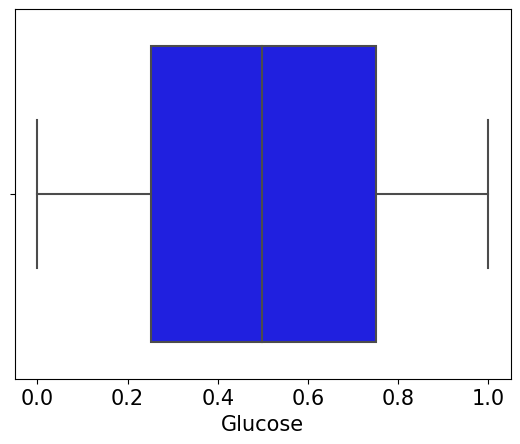

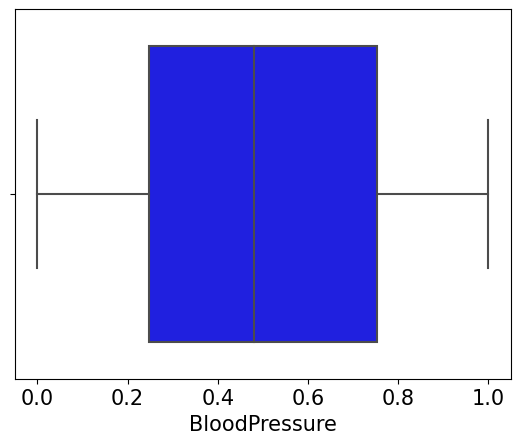

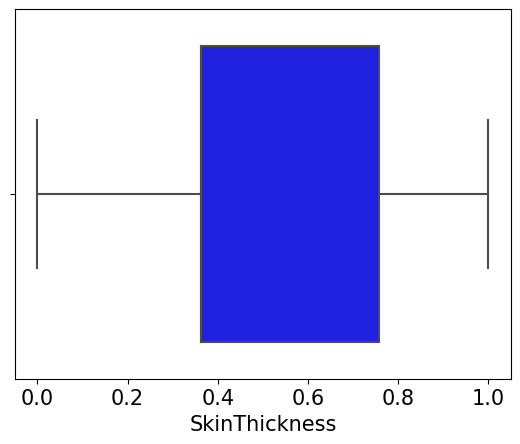

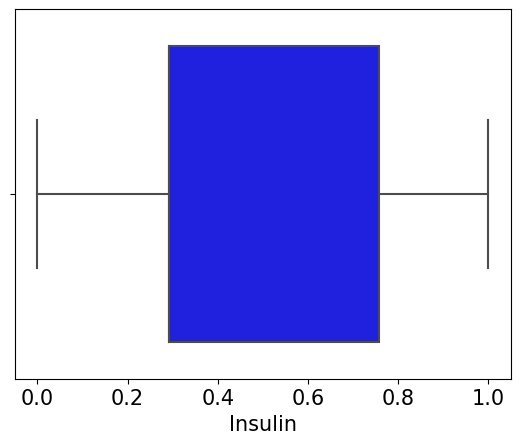

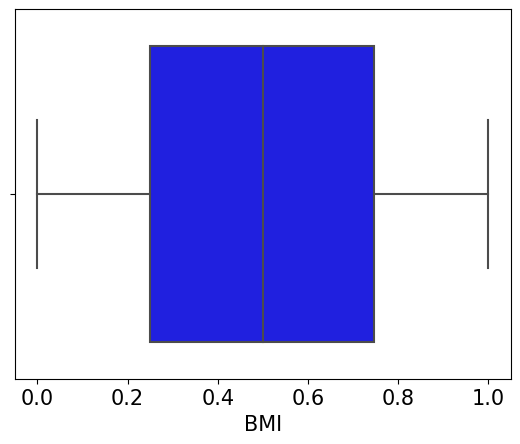

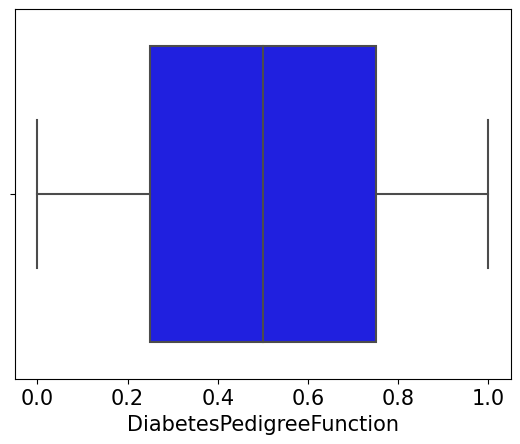

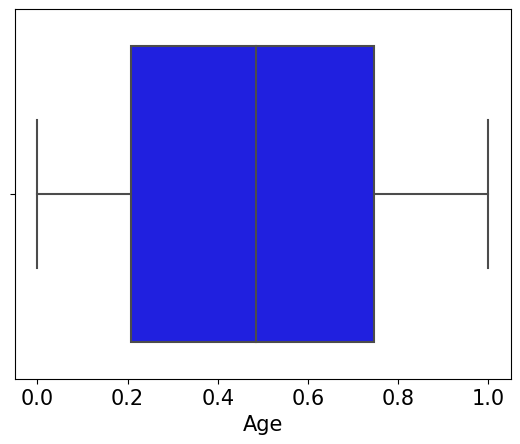

In [23]:
# verify if the outliers are present or not.
x = df_new.drop(['Outcome'],axis = 1)
for i in x.columns:
    sns.boxplot(x = i, data = x,color = 'blue') 
    plt.xlabel(i)
    plt.show()

In [24]:
X = df_new.drop(columns='Outcome', axis=1)
Y = df_new['Outcome']
X.head() # independent features

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.535354,0.590909,0.363636,0.292929,0.191919,0.141414,0.540404
1,0.030303,0.035354,0.717172,0.621212,0.464646,0.232323,0.358586
2,0.525253,0.373737,0.363636,0.292929,0.676768,0.030303,0.484848
3,1.000000,0.479798,0.939394,0.989899,0.444444,0.060606,0.959596
4,0.303030,0.797980,0.363636,0.292929,0.686869,0.515152,0.929293


In [25]:
# Train And Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.3,random_state=12) # Splitting in the ratio of 60% for train, 40% for test.

## Logestic Regression

In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic.fit(X_train, y_train)
y_pred_lr = logic.predict(X_test)

log_train = round(logic.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 75.71 %
Model Accuracy Score : 86.67 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        20
         1.0       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.87      0.82      0.84        30
weighted avg       0.87      0.87      0.86        30

--------------------------------------------------------


## Support Vector

In [27]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))

Training Accuracy    : 85.71 %
Model Accuracy Score : 86.67 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        20
         1.0       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.87      0.82      0.84        30
weighted avg       0.87      0.87      0.86        30



## Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 80.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        20
         1.0       0.70      0.70      0.70        10

    accuracy                           0.80        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.80      0.80      0.80        30

--------------------------------------------------------


## KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 84.29 %
Model Accuracy Score : 86.67 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        20
         1.0       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.87      0.82      0.84        30
weighted avg       0.87      0.87      0.86        30

--------------------------------------------------------


## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(X_train, y_train)
y_pred_dec = random.predict(X_test)

random_train = round(random.score(X_train, y_train) * 100, 2)
random_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",random_train ,"%")
print("Model Accuracy Score :",random_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 83.33 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.95      0.88        20
         1.0       0.86      0.60      0.71        10

    accuracy                           0.83        30
   macro avg       0.84      0.77      0.79        30
weighted avg       0.84      0.83      0.82        30

--------------------------------------------------------



## Comparing Different Models

In [31]:
# Create a variable 
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Decission Tree', 'Random Forest'],
                       'Training Accuracy':[svc_train,knn_train,log_train,decision_train, random_train],
                       'Model Accuracy':[svc_accuracy,knn_accuracy,log_accuracy,decision_accuracy, random_accuracy]})

In [37]:
models.sort_values(by='Model Accuracy', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Training Accuracy,Model Accuracy
Support Vector Machines,85.710000,86.670000
KNN,84.290000,86.670000
Logistic Regression,75.710000,86.670000
Random Forest,100.000000,83.330000
Decission Tree,100.000000,80.000000


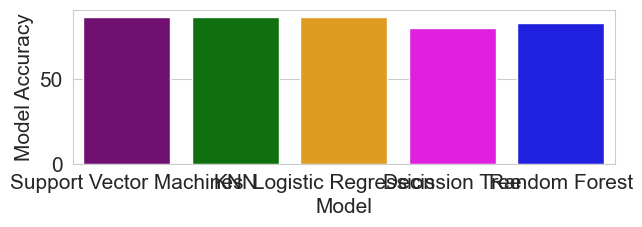

In [38]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(7,2))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Model Accuracy'], palette=colors )
plt.show()

## FINAL PREDICTIONS

In [34]:
# Make predictions on unseen data, here i have given random values for each features in the input_data
# take the data  and store in the variable 
input_data = (136,120,40,150,24,0.727000,20)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data) # converting this list into numpy array

# reshape the numpy array as we are predicting for one instance

input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

[[ 95.     90.     40.    150.     24.      0.727  20.   ]]


In [35]:
# predict
predictions = logic.predict(input_data_reshaped)
print(predictions)
if predictions[0] == 1:
    print("The patient is predicted to have diabetes.")
else:
    print("The patient is predicted to not have diabetes.")
    

[1.]
The patient is predicted to have diabetes.
